# Library

In [3]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pymongo
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder

# Dataset

In [4]:
client = pymongo.MongoClient("mongodb://localhost:27017/")
db = client["ecommerce_db"]
collection = db["data_perilaku_pengguna_ecommerce"]



In [5]:
offset = 50000
batch_size = 50000

# Query dengan skip dan limit
cursor = collection.find().skip(offset).limit(batch_size)
data = list(cursor)



In [6]:

# Ubah ke DataFrame
df = pd.DataFrame(data)



In [7]:
df

,_id,User ID,Item ID,Category ID,Behavior type,Timestamp
0,6821f58118a8dab949e28ad3,194765,778691,3312150,pv,1511797363
1,6821f58118a8dab949e28ad4,194765,4832701,3855599,pv,1511797478
2,6821f58118a8dab949e28ad5,194765,402784,3855599,pv,1511797556
3,6821f58118a8dab949e28ad6,194765,3340665,4583884,pv,1511797645
4,6821f58118a8dab949e28ad7,194765,2397648,4466876,pv,1511797786
...,...,...,...,...,...,...
49995,6821f58118a8dab949e34e1e,312984,3908785,4310023,pv,1512024669
49996,6821f58118a8dab949e34e1f,312984,2232979,2885642,pv,1512110932
49997,6821f58118a8dab949e34e20,312984,1687312,2885642,pv,1512110968
49998,6821f58118a8dab949e34e21,312984,599585,4921805,pv,1512127762


# Preprocessing

In [8]:
behavior_order = [['pv', 'fav', 'cart', 'buy']]
ordinal_encoder = OrdinalEncoder(categories=behavior_order)
df['behavior_encoded'] = ordinal_encoder.fit_transform(df[['Behavior type']])

In [9]:
id_features = ['User ID', 'Item ID', 'Category ID']
standard_scaler = StandardScaler()
df[id_features] = standard_scaler.fit_transform(df[id_features])

In [10]:
minmax_scaler = MinMaxScaler()
df['timestamp_scaled'] = minmax_scaler.fit_transform(df[['Timestamp']])

In [20]:
features_for_clustering = [
                'Item ID', 'Category ID',
                'behavior_encoded', 'timestamp_scaled'
            ]

In [21]:
features_for_clustering

['Item ID', 'Category ID', 'behavior_encoded', 'timestamp_scaled']

In [22]:
df

,_id,User ID,Item ID,Category ID,Behavior type,Timestamp,behavior_encoded,timestamp_scaled,dbscan_label
0,6821f58118a8dab949e28ad3,-0.316463,-1.195421,0.425040,pv,1511797363,0.0,0.373471,0
1,6821f58118a8dab949e28ad4,-0.316463,1.511317,0.794721,pv,1511797478,0.0,0.373609,0
2,6821f58118a8dab949e28ad5,-0.316463,-1.446402,0.794721,pv,1511797556,0.0,0.373703,0
3,6821f58118a8dab949e28ad6,-0.316463,0.515130,1.290138,pv,1511797645,0.0,0.373811,0
4,6821f58118a8dab949e28ad7,-0.316463,-0.114493,1.210543,pv,1511797786,0.0,0.373981,0
...,...,...,...,...,...,...,...,...,...
49995,6821f58118a8dab949e34e1e,0.945266,0.894447,1.103844,pv,1512024669,0.0,0.647662,11
49996,6821f58118a8dab949e34e1f,0.945266,-0.224437,0.134908,pv,1512110932,0.0,0.751718,11
49997,6821f58118a8dab949e34e20,0.945266,-0.588763,0.134908,pv,1512110968,0.0,0.751761,11
49998,6821f58118a8dab949e34e21,0.945266,-1.315004,1.520009,pv,1512127762,0.0,0.772019,11


In [23]:
# df[['User ID', 'Item ID', 'Category ID', 'behavior_encoded', 'timestamp_scaled']]
# df.drop(columns=[["_id", "Behavior type", "Timestamp"]], inplace=True)

In [23]:
df

,_id,User ID,Item ID,Category ID,Behavior type,Timestamp,behavior_encoded,timestamp_scaled,dbscan_label
0,6821f58118a8dab949e28ad3,-0.316463,-1.195421,0.425040,pv,1511797363,0.0,0.373471,0
1,6821f58118a8dab949e28ad4,-0.316463,1.511317,0.794721,pv,1511797478,0.0,0.373609,0
2,6821f58118a8dab949e28ad5,-0.316463,-1.446402,0.794721,pv,1511797556,0.0,0.373703,0
3,6821f58118a8dab949e28ad6,-0.316463,0.515130,1.290138,pv,1511797645,0.0,0.373811,0
4,6821f58118a8dab949e28ad7,-0.316463,-0.114493,1.210543,pv,1511797786,0.0,0.373981,0
...,...,...,...,...,...,...,...,...,...
49995,6821f58118a8dab949e34e1e,0.945266,0.894447,1.103844,pv,1512024669,0.0,0.647662,11
49996,6821f58118a8dab949e34e1f,0.945266,-0.224437,0.134908,pv,1512110932,0.0,0.751718,11
49997,6821f58118a8dab949e34e20,0.945266,-0.588763,0.134908,pv,1512110968,0.0,0.751761,11
49998,6821f58118a8dab949e34e21,0.945266,-1.315004,1.520009,pv,1512127762,0.0,0.772019,11


In [24]:
df[['Item ID', 'Category ID', 'behavior_encoded', 'timestamp_scaled']]

,Item ID,Category ID,behavior_encoded,timestamp_scaled
0,-1.195421,0.425040,0.0,0.373471
1,1.511317,0.794721,0.0,0.373609
2,-1.446402,0.794721,0.0,0.373703
3,0.515130,1.290138,0.0,0.373811
4,-0.114493,1.210543,0.0,0.373981
...,...,...,...,...
49995,0.894447,1.103844,0.0,0.647662
49996,-0.224437,0.134908,0.0,0.751718
49997,-0.588763,0.134908,0.0,0.751761
49998,-1.315004,1.520009,0.0,0.772019


# Algoritma DBSCAN

In [25]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np

# Prepare feature matrix
X = df[features_for_clustering].values

# # (Re)scale features for DBSCAN — adjust if you prefer different scaling
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# Run DBSCAN — tune eps and min_samples for your dataset
db = DBSCAN(eps=0.5, min_samples=5, metric='euclidean', n_jobs=-1)
labels = db.fit_predict(X)

# Attach labels to dataframe
df['dbscan_label'] = labels

# Summary of clustering
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = int((labels == -1).sum())
print(f"Clusters found: {n_clusters}, Noise points: {n_noise}")

# Optional: silhouette score (exclude noise)
if n_clusters > 1:
    mask = labels != -1
    sil = silhouette_score(X[mask], labels[mask])
    print(f"Silhouette score (excluding noise): {sil:.4f}")
else:
    print("Silhouette score not defined (need at least 2 clusters).")

Clusters found: 4, Noise points: 0
Silhouette score (excluding noise): 0.1435


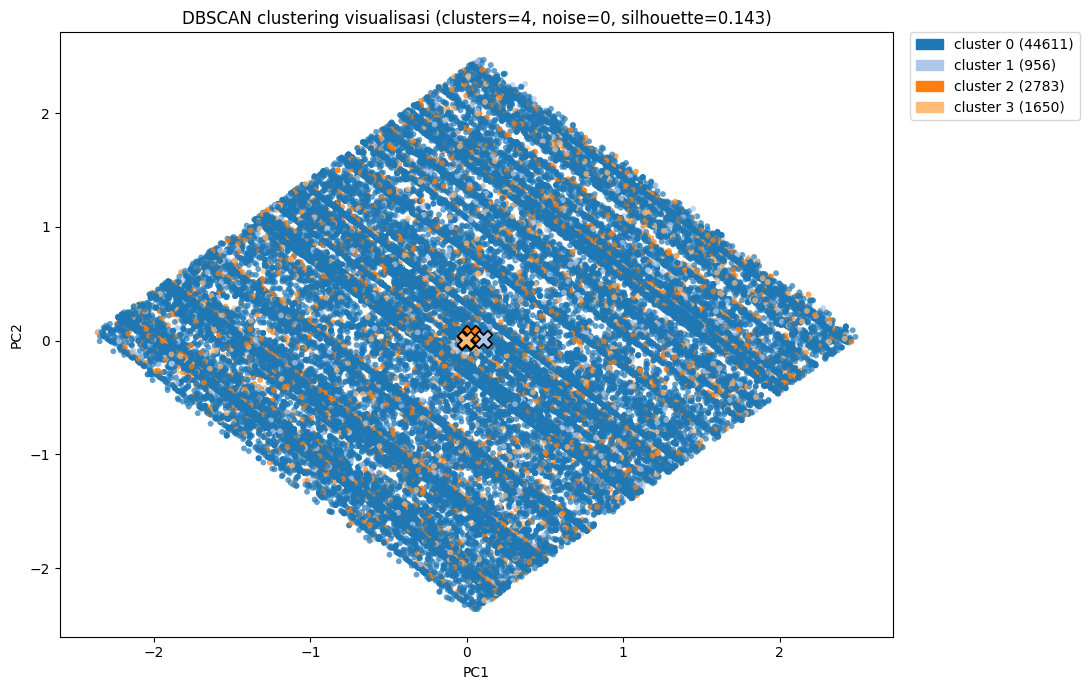

In [26]:
from sklearn.decomposition import PCA
import numpy as np

import matplotlib.patches as mpatches

# Project features to 2D for visualization
pca = PCA(n_components=2, random_state=42)
X_2d = pca.fit_transform(X)

# Prepare color mapping (noise = -1 shown in gray)
unique_labels = np.unique(labels)
non_noise_labels = [l for l in unique_labels if l != -1]
palette = sns.color_palette("tab20", n_colors=max(8, len(non_noise_labels)))
color_map = {lab: palette[i % len(palette)] for i, lab in enumerate(sorted(non_noise_labels))}
if -1 in unique_labels:
    color_map[-1] = (0.6, 0.6, 0.6)  # gray for noise

point_colors = [color_map[l] for l in labels]

# Plot
plt.figure(figsize=(11, 7))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=point_colors, s=18, alpha=0.7, linewidths=0)

# Plot cluster centers (mean in PCA space) for non-noise clusters
centers = {}
for l in non_noise_labels:
    mask_l = (labels == l)
    centers[l] = X_2d[mask_l].mean(axis=0)
    plt.scatter(centers[l][0], centers[l][1], marker='X', s=160, edgecolor='k',
                linewidth=1.2, color=color_map[l], zorder=5)

# Legend with counts
counts = {int(l): int((labels == l).sum()) for l in unique_labels}
legend_handles = []
for l in sorted(unique_labels):
    lbl_name = "noise" if int(l) == -1 else f"cluster {int(l)}"
    legend_handles.append(mpatches.Patch(color=color_map[int(l)], label=f"{lbl_name} ({counts[int(l)]})"))
plt.legend(handles=legend_handles, bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

# Titles and labels
sil_text = f", silhouette={float(sil):.3f}" if 'sil' in globals() else ""
plt.title(f"DBSCAN clustering visualisasi (clusters={n_clusters}, noise={n_noise}{sil_text})")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.tight_layout()
plt.show()

In [29]:
df

,_id,User ID,Item ID,Category ID,Behavior type,Timestamp,behavior_encoded,timestamp_scaled,dbscan_label
0,6821f58118a8dab949e28ad3,-0.316463,-1.195421,0.425040,pv,1511797363,0.0,0.373471,0
1,6821f58118a8dab949e28ad4,-0.316463,1.511317,0.794721,pv,1511797478,0.0,0.373609,0
2,6821f58118a8dab949e28ad5,-0.316463,-1.446402,0.794721,pv,1511797556,0.0,0.373703,0
3,6821f58118a8dab949e28ad6,-0.316463,0.515130,1.290138,pv,1511797645,0.0,0.373811,0
4,6821f58118a8dab949e28ad7,-0.316463,-0.114493,1.210543,pv,1511797786,0.0,0.373981,0
...,...,...,...,...,...,...,...,...,...
49995,6821f58118a8dab949e34e1e,0.945266,0.894447,1.103844,pv,1512024669,0.0,0.647662,0
49996,6821f58118a8dab949e34e1f,0.945266,-0.224437,0.134908,pv,1512110932,0.0,0.751718,0
49997,6821f58118a8dab949e34e20,0.945266,-0.588763,0.134908,pv,1512110968,0.0,0.751761,0
49998,6821f58118a8dab949e34e21,0.945266,-1.315004,1.520009,pv,1512127762,0.0,0.772019,0


In [30]:
df['dbscan_label'].unique()

array([0, 1, 2, 3], dtype=int64)

# Features Selections

# Skema DBSTREAM

In [1]:
from river import cluster
from river import stream